<a href="https://colab.research.google.com/github/EL-Zhou/2019-09-23-gwu/blob/gh-pages/SFL_Challenges_Forcest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project aimed to forecast the number of days that are high for PM2.5 levels averaged over the course of each month for each city.  

In [1]:
#Problem statment:


The dataset ranged from Januarey 2010 to Decnement 2015.
PM2.5 is evlateate by two mausrements: local, and US_post 

Problem statment:
Build a model to predict the total number of days PM2.5 is above the average monthly merauremsnet for the given city. 
The data is pre-processed in year/momth and 
Conclursion: 

# Notebook Configuration
## Google drive

In [2]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath = '/content/drive/My Drive/sfl/'

# Get the absolute path of the deep utilities folder
dataset = '/content/drive/My Drive/sfl/dataset/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Libraries

In [72]:
#load libariers
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np

import plotly.graph_objects as go
import plotly.express as px

#import datetime module
import datetime as dt

import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.tsa.holtwinters as ets
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#from lifelines import KaplanMeierFitter
from scipy.signal import dlsim
from scipy.stats import chi2
from scipy.stats import t
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller


# Warnings

In [4]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Matplotlib

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

In [6]:
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

#Data Preprocessing

## Loading data

In [7]:
# Loading data 
raw_beijing = pd.read_csv(dataset + 'BeijingPM20100101_20151231.csv', index_col=0, header=0)
raw_chengdu = pd.read_csv(dataset + 'ChengduPM20100101_20151231.csv', index_col=0, header=0)
raw_guangzhou = pd.read_csv(dataset + 'GuangzhouPM20100101_20151231.csv', index_col=0, header=0)
raw_shanghai = pd.read_csv(dataset + 'ShanghaiPM20100101_20151231.csv', index_col=0, header=0)
raw_shenyang = pd.read_csv(dataset + 'ShenyangPM20100101_20151231.csv', index_col=0, header=0)

# Inspect raw dataframe
display_side_by_side(raw_beijing.head(),raw_chengdu.head(),
                     raw_guangzhou.head(),raw_shanghai.head(),
                     raw_shenyang.head(), 
                     titles=['Beijing','Chengdu','Guangzhou','Shanghai','Shenyang']) 

Beijing 
 
 
 
 year 
 month 
 day 
 hour 
 season 
 PM_Dongsi 
 PM_Dongsihuan 
 PM_Nongzhanguan 
 PM_US Post 
 DEWP 
 HUMI 
 PRES 
 TEMP 
 cbwd 
 Iws 
 precipitation 
 Iprec 
 
 
 No 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 1 
 2010 
 1 
 1 
 0 
 4 
 NaN 
 NaN 
 NaN 
 NaN 
 -21.0 
 43.0 
 1021.0 
 -11.0 
 NW 
 1.79 
 0.0 
 0.0 
 
 
 2 
 2010 
 1 
 1 
 1 
 4 
 NaN 
 NaN 
 NaN 
 NaN 
 -21.0 
 47.0 
 1020.0 
 -12.0 
 NW 
 4.92 
 0.0 
 0.0 
 
 
 3 
 2010 
 1 
 1 
 2 
 4 
 NaN 
 NaN 
 NaN 
 NaN 
 -21.0 
 43.0 
 1019.0 
 -11.0 
 NW 
 6.71 
 0.0 
 0.0 
 
 
 4 
 2010 
 1 
 1 
 3 
 4 
 NaN 
 NaN 
 NaN 
 NaN 
 -21.0 
 55.0 
 1019.0 
 -14.0 
 NW 
 9.84 
 0.0 
 0.0 
 
 
 5 
 2010 
 1 
 1 
 4 
 4 
 NaN 
 NaN 
 NaN 
 NaN 
 -20.0 
 51.0 
 1018.0 
 -12.0 
 NW 
 12.97 
 0.0 
 0.0 
 
 
 Chengdu 
 
 
 
 year 
 month 
 day 
 hour 
 season 
 PM_Caotangsi 
 PM_Shahepu 
 PM_US Post 
 DEWP 
 HUMI 
 PRES 
 TEMP 
 cbwd 
 Iws 
 precipitation 
 Iprec 
 
 
 No 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 1 
 2010 
 1 
 1 
 0 
 4 
 NaN 
 NaN 
 NaN 
 4.0 
 81.20 
 1022.0 
 7.0 
 cv 
 1.0 
 0.0 
 0.0 
 
 
 2 
 2010 
 1 
 1 
 1 
 4 
 NaN 
 NaN 
 NaN 
 4.0 
 86.99 
 1022.0 
 6.0 
 cv 
 1.0 
 0.0 
 0.0 
 
 
 3 
 2010 
 1 
 1 
 2 
 4 
 NaN 
 NaN 
 NaN 
 4.0 
 86.99 
 1021.0 
 6.0 
 cv 
 1.0 
 0.0 
 0.0 
 
 
 4 
 2010 
 1 
 1 
 3 
 4 
 NaN 
 NaN 
 NaN 
 3.0 
 86.89 
 1021.0 
 5.0 
 cv 
 1.0 
 0.0 
 0.0 
 
 
 5 
 2010 
 1 
 1 
 4 
 4 
 NaN 
 NaN 
 NaN 
 2.0 
 86.79 
 1021.0 
 4.0 
 cv 
 1.0 
 0.0 
 0.0 
 
 
 Guangzhou 
 
 
 
 year 
 month 
 day 
 hour 
 season 
 PM_City Station 
 PM_5th Middle School 
 PM_US Post 
 DEWP 
 HUMI 
 PRES 
 TEMP 
 cbwd 
 Iws 
 precipitation 
 Iprec 
 
 
 No 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 1 
 2010 
 1 
 1 
 0 
 4.0 
 NaN 
 NaN 
 NaN 
 9.4 
 76.0 
 1015.1 
 13.5 
 NW 
 0.8 
 0.0 
 0.0 
 
 
 2 
 2010 
 1 
 1 
 1 
 4.0 
 NaN 
 NaN 
 NaN 
 10.2 
 83.0 
 1015.2 
 13.0 
 cv 
 0.5 
 0.0 
 0.0 
 
 
 3 
 2010 
 1 
 1 
 2 
 4.0 
 NaN 
 NaN 
 NaN 
 10.4 
 87.0 
 1015.0 
 12.5 
 NW 
 0.6 
 0.3 
 0.3 
 
 
 4 
 2010 
 1 
 1 
 3 
 4.0 
 NaN 
 NaN 
 NaN 
 10.2 
 89.0 
 1014.9 
 12.0 
 NW 
 1.4 
 0.6 
 0.9 
 
 
 5 
 2010 
 1 
 1 
 4 
 4.0 
 NaN 
 NaN 
 NaN 
 10.4 
 91.0 
 1014.6 
 11.8 
 NE 
 0.6 
 0.7 
 1.6 
 
 
 Shanghai 
 
 
 
 year 
 month 
 day 
 hour 
 season 
 PM_Jingan 
 PM_US Post 
 PM_Xuhui 
 DEWP 
 HUMI 
 PRES 
 TEMP 
 cbwd 
 Iws 
 precipitation 
 Iprec 
 
 
 No 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 1 
 2010 
 1 
 1 
 0 
 4 
 NaN 
 NaN 
 NaN 
 -6.0 
 59.48 
 1026.1 
 1.0 
 cv 
 1.0 
 0.0 
 0.0 
 
 
 2 
 2010 
 1 
 1 
 1 
 4 
 NaN 
 NaN 
 NaN 
 -6.0 
 59.48 
 1025.1 
 1.0 
 SE 
 2.0 
 0.0 
 0.0 
 
 
 3 
 2010 
 1 
 1 
 2 
 4 
 NaN 
 NaN 
 NaN 
 -7.0 
 59.21 
 1025.1 
 0.0 
 SE 
 4.0 
 0.0 
 0.0 
 
 
 4 
 2010 
 1 
 1 
 3 
 4 
 NaN 
 NaN 
 NaN 
 -6.0 
 63.94 
 1024.0 
 0.0 
 SE 
 5.0 
 0.0 
 0.0 
 
 
 5 
 2010 
 1 
 1 
 4 
 4 
 NaN 
 NaN 
 NaN 
 -6.0 
 63.94 
 1023.0 
 0.0 
 SE 
 8.0 
 0.0 
 0.0 
 
 
 Shenyang 
 
 
 
 year 
 month 
 day 
 hour 
 season 
 PM_Taiyuanjie 
 PM_US Post 
 PM_Xiaoheyan 
 DEWP 
 HUMI 
 PRES 
 TEMP 
 cbwd 
 Iws 
 precipitation 
 Iprec 
 
 
 No 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 1 
 2010 
 1 
 1 
 0 
 4 
 NaN 
 NaN 
 NaN 
 -26.0 
 69.79 
 1024.0 
 -22.0 
 NE 
 1.0289 
 NaN 
 NaN 
 
 
 2 
 2010 
 1 
 1 
 1 
 4 
 NaN 
 NaN 
 NaN 
 -26.0 
 76.26 
 1024.0 
 -23.0 
 NE 
 2.5722 
 NaN 
 NaN 
 
 
 3 
 2010 
 1 
 1 
 2 
 4 
 NaN 
 NaN 
 NaN 
 -27.0 
 69.56 
 1023.0 
 -23.0 
 NE 
 5.1444 
 NaN 
 NaN 
 
 
 4 
 2010 
 1 
 1 
 3 
 4 
 NaN 
 NaN 
 NaN 
 -27.0 
 69.56 
 1023.0 
 -23.0 
 NE 
 7.7166 
 NaN 
 NaN 
 
 
 5 
 2010 
 1 
 1 
 4 
 4 
 NaN 
 NaN 
 NaN 
 -27.0 
 69.56 
 1022.0 
 -23.0 
 NE 
 9.7744 
 NaN 
 NaN

In [8]:
# Shape of raw dataframes
print(
    "Beijing:",raw_beijing.shape, 
    "\nChengdu:",raw_chengdu.shape,
    "\nGuangzhou:", raw_guangzhou.shape,
    "\nShenyang:", raw_shanghai.shape,
    "\nShanghai:", raw_shenyang.shape)

Beijing: (52584, 17) 
Chengdu: (52584, 16) 
Guangzhou: (52584, 16) 
Shenyang: (52584, 16) 
Shanghai: (52584, 16)


### Total Number of Obersvations

In [9]:
# Getting the info of dataframe
# Inspect raw dataframe
print(raw_beijing.info(),
      raw_chengdu.info(),
      raw_guangzhou.info(),
      raw_shanghai.info(),
      raw_shenyang.info()) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52584 entries, 1 to 52584
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             52584 non-null  int64  
 1   month            52584 non-null  int64  
 2   day              52584 non-null  int64  
 3   hour             52584 non-null  int64  
 4   season           52584 non-null  int64  
 5   PM_Dongsi        25052 non-null  float64
 6   PM_Dongsihuan    20508 non-null  float64
 7   PM_Nongzhanguan  24931 non-null  float64
 8   PM_US Post       50387 non-null  float64
 9   DEWP             52579 non-null  float64
 10  HUMI             52245 non-null  float64
 11  PRES             52245 non-null  float64
 12  TEMP             52579 non-null  float64
 13  cbwd             52579 non-null  object 
 14  Iws              52579 non-null  float64
 15  precipitation    52100 non-null  float64
 16  Iprec            52100 non-null  float64
dtypes: float64(1

In [10]:
# Datatype of each columns
raw_beijing.dtypes

year                 int64
month                int64
day                  int64
hour                 int64
season               int64
PM_Dongsi          float64
PM_Dongsihuan      float64
PM_Nongzhanguan    float64
PM_US Post         float64
DEWP               float64
HUMI               float64
PRES               float64
TEMP               float64
cbwd                object
Iws                float64
precipitation      float64
Iprec              float64
dtype: object

In [11]:
# Convert season into object
raw_beijing.season = raw_beijing.season.astype(object)
raw_chengdu.season = raw_chengdu.season.astype(object)
raw_guangzhou.season = raw_guangzhou.season.astype(object)
raw_shanghai.season = raw_shenyang.season.astype(object)
raw_shenyang.season = raw_shanghai.season.astype(object)

# Recheck
raw_beijing.dtypes

year                 int64
month                int64
day                  int64
hour                 int64
season              object
PM_Dongsi          float64
PM_Dongsihuan      float64
PM_Nongzhanguan    float64
PM_US Post         float64
DEWP               float64
HUMI               float64
PRES               float64
TEMP               float64
cbwd                object
Iws                float64
precipitation      float64
Iprec              float64
dtype: object

# Missing values

In [12]:
# Count na value per column
raw_beijing.isnull().sum()
raw_chengdu.isnull().sum()
raw_guangzhou.isnull().sum()
raw_shanghai.isnull().sum()
raw_shenyang.isnull().sum()

year                 0
month                0
day                  0
hour                 0
season               0
PM_Taiyuanjie    28196
PM_US Post       30904
PM_Xiaoheyan     27957
DEWP               692
HUMI               680
PRES               692
TEMP               692
cbwd               692
Iws                692
precipitation    12763
Iprec            12763
dtype: int64

In [13]:
# Drop rows contains
raw_beijing_draft = raw_beijing.dropna()
raw_chengdu_draft = raw_chengdu.dropna()
raw_guangzhou_draft = raw_guangzhou.dropna()
raw_shanghai_draft = raw_shanghai.dropna()
raw_shenyang_draft = raw_shenyang.dropna()

In [14]:
# Combine year/month/day column and conver datatime into datetime type
raw_beijing_draft ['date']= pd.to_datetime(raw_beijing_draft [['year','month','day','hour']])
raw_chengdu_draft ['date']= pd.to_datetime(raw_chengdu_draft [['year','month','day','hour']])
raw_guangzhou_draft ['date']= pd.to_datetime(raw_guangzhou_draft [['year','month','day','hour']])
raw_shenyang_draft ['date']= pd.to_datetime(raw_shenyang_draft [['year','month','day','hour']])
raw_shanghai_draft ['date']= pd.to_datetime(raw_shanghai_draft [['year','month','day','hour']])

# Inspect
display_side_by_side(raw_beijing_draft.head(),raw_chengdu_draft.head(),
                     raw_guangzhou_draft.head(),raw_shanghai_draft.head(),
                     raw_shenyang_draft.head(), 
                     titles=['Beijing','Chengdu','Guangzhou','Shanghai','Shenyang']) 

Beijing 
 
 
 
 year 
 month 
 day 
 hour 
 season 
 PM_Dongsi 
 PM_Dongsihuan 
 PM_Nongzhanguan 
 PM_US Post 
 DEWP 
 HUMI 
 PRES 
 TEMP 
 cbwd 
 Iws 
 precipitation 
 Iprec 
 date 
 
 
 No 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 27825 
 2013 
 3 
 5 
 8 
 1 
 117.0 
 166.0 
 140.0 
 150.0 
 -6.0 
 59.0 
 1019.0 
 1.0 
 cv 
 0.89 
 0.0 
 0.0 
 2013-03-05 08:00:00 
 
 
 27826 
 2013 
 3 
 5 
 9 
 1 
 131.0 
 165.0 
 152.0 
 163.0 
 -8.0 
 38.0 
 1019.0 
 5.0 
 cv 
 1.78 
 0.0 
 0.0 
 2013-03-05 09:00:00 
 
 
 27827 
 2013 
 3 
 5 
 10 
 1 
 141.0 
 173.0 
 128.0 
 172.0 
 -8.0 
 31.0 
 1018.0 
 8.0 
 cv 
 2.67 
 0.0 
 0.0 
 2013-03-05 10:00:00 
 
 
 27829 
 2013 
 3 
 5 
 12 
 1 
 169.0 
 182.0 
 3.0 
 181.0 
 -9.0 
 23.0 
 1017.0 
 11.0 
 cv 
 4.45 
 0.0 
 0.0 
 2013-03-05 12:00:00 
 
 
 27830 
 2013 
 3 
 5 
 13 
 1 
 169.0 
 169.0 
 3.0 
 187.0 
 -9.0 
 22.0 
 1015.0 
 12.0 
 cv 
 5.34 
 0.0 
 0.0 
 2013-03-05 13:00:00 
 
 
 Chengdu 
 
 
 
 year 
 month 
 day 
 hour 
 season 
 PM_Caotangsi 
 PM_Shahepu 
 PM_US Post 
 DEWP 
 HUMI 
 PRES 
 TEMP 
 cbwd 
 Iws 
 precipitation 
 Iprec 
 date 
 
 
 No 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 26305 
 2013 
 1 
 1 
 0 
 4 
 121.0 
 138.0 
 129.0 
 -4.0 
 64.42 
 1022.0 
 2.0 
 cv 
 1.0 
 0.0 
 0.0 
 2013-01-01 00:00:00 
 
 
 26306 
 2013 
 1 
 1 
 1 
 4 
 134.0 
 159.0 
 135.0 
 -3.0 
 80.19 
 1022.0 
 0.0 
 cv 
 1.0 
 0.0 
 0.0 
 2013-01-01 01:00:00 
 
 
 26318 
 2013 
 1 
 1 
 13 
 4 
 159.0 
 181.0 
 132.0 
 -9.0 
 26.99 
 1018.0 
 9.0 
 SW 
 1.0 
 0.0 
 0.0 
 2013-01-01 13:00:00 
 
 
 26319 
 2013 
 1 
 1 
 14 
 4 
 168.0 
 184.0 
 100.0 
 -8.0 
 27.29 
 1017.0 
 10.0 
 SW 
 2.0 
 0.0 
 0.0 
 2013-01-01 14:00:00 
 
 
 26320 
 2013 
 1 
 1 
 15 
 4 
 143.0 
 162.0 
 101.0 
 -7.0 
 29.48 
 1015.0 
 10.0 
 NE 
 2.0 
 0.0 
 0.0 
 2013-01-01 15:00:00 
 
 
 Guangzhou 
 
 
 
 year 
 month 
 day 
 hour 
 season 
 PM_City Station 
 PM_5th Middle School 
 PM_US Post 
 DEWP 
 HUMI 
 PRES 
 TEMP 
 cbwd 
 Iws 
 precipitation 
 Iprec 
 date 
 
 
 No 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 26305 
 2013 
 1 
 1 
 0 
 4 
 83.0 
 78.0 
 83.0 
 3.7 
 91.0 
 1014.2 
 5.0 
 NW 
 1.9 
 0.0 
 0.0 
 2013-01-01 00:00:00 
 
 
 26306 
 2013 
 1 
 1 
 1 
 4 
 95.0 
 70.0 
 95.0 
 4.2 
 88.0 
 1014.2 
 6.0 
 NW 
 3.4 
 0.0 
 0.0 
 2013-01-01 01:00:00 
 
 
 26308 
 2013 
 1 
 1 
 3 
 4 
 55.0 
 66.0 
 55.0 
 3.5 
 76.0 
 1013.9 
 7.5 
 NW 
 5.8 
 0.0 
 0.0 
 2013-01-01 03:00:00 
 
 
 26309 
 2013 
 1 
 1 
 4 
 4 
 60.0 
 69.0 
 60.0 
 2.7 
 69.0 
 1013.9 
 8.0 
 NW 
 8.2 
 0.0 
 0.0 
 2013-01-01 04:00:00 
 
 
 26310 
 2013 
 1 
 1 
 5 
 4 
 41.0 
 51.0 
 41.0 
 1.5 
 62.0 
 1014.2 
 8.4 
 NW 
 9.0 
 0.0 
 0.0 
 2013-01-01 05:00:00 
 
 
 Shanghai 
 
 
 
 year 
 month 
 day 
 hour 
 season 
 PM_Jingan 
 PM_US Post 
 PM_Xuhui 
 DEWP 
 HUMI 
 PRES 
 TEMP 
 cbwd 
 Iws 
 precipitation 
 Iprec 
 date 
 
 
 No 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 26305 
 2013 
 1 
 1 
 0 
 4 
 66.0 
 70.0 
 71.0 
 -5.0 
 69.00 
 1023.0 
 0.0 
 SW 
 60.0 
 0.0 
 0.0 
 2013-01-01 00:00:00 
 
 
 26306 
 2013 
 1 
 1 
 1 
 4 
 67.0 
 76.0 
 72.0 
 -5.0 
 69.00 
 1023.0 
 0.0 
 SW 
 62.0 
 0.0 
 0.0 
 2013-01-01 01:00:00 
 
 
 26308 
 2013 
 1 
 1 
 3 
 4 
 73.0 
 78.0 
 74.0 
 -4.0 
 74.41 
 1023.0 
 0.0 
 SW 
 65.0 
 0.0 
 0.0 
 2013-01-01 03:00:00 
 
 
 26309 
 2013 
 1 
 1 
 4 
 4 
 75.0 
 77.0 
 77.0 
 -4.0 
 80.04 
 1023.0 
 -1.0 
 SW 
 68.0 
 0.0 
 0.0 
 2013-01-01 04:00:00 
 
 
 26310 
 2013 
 1 
 1 
 5 
 4 
 73.0 
 78.0 
 80.0 
 -4.0 
 80.04 
 1023.0 
 -1.0 
 SW 
 70.0 
 0.0 
 0.0 
 2013-01-01 05:00:00 
 
 
 Shenyang 
 
 
 
 year 
 month 
 day 
 hour 
 season 
 PM_Taiyuanjie 
 PM_US Post 
 PM_Xiaoheyan 
 DEWP 
 HUMI 
 PRES 
 TEMP 
 cbwd 
 Iws 
 precipitation 
 Iprec 
 date 
 
 
 No 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 28982 
 2013 
 4 
 22 
 13 
 1 
 141.0 
 113.0 
 140.0 
 -1.0 
 25.89 
 1013.0 
 19.0 
 SW 
 55.0 
 0.0 
 0.0 
 2013-04-22 13:00:00 
 
 
 29003 
 2013 
 4 
 23 
 10 
 1 
 59.0 
 59.0 
 49

In [15]:
# Find the time range of raw dataset
print('Raw Beijing -> Starting date:', raw_beijing_draft ['date'].min(),
                     'Ending date:',   raw_beijing_draft ['date'].max(),
      '\nRaw Chengdu -> Starting date:', raw_chengdu_draft ['date'].min(),
                      'Ending date:',     raw_chengdu_draft ['date'].max(),
      '\nRaw Guangzhou -> Starting date:', raw_guangzhou_draft ['date'].min(),
                         'Ending date:',     raw_guangzhou_draft ['date'].max(),
      '\nRaw Shenyang -> Starting date:', raw_shenyang_draft ['date'].min(),
                         'Ending date:', raw_shenyang_draft ['date'].max(),
      '\nRaw Shanghai -> Starting date:', raw_shanghai_draft ['date'].min(),
                        'Ending date:', raw_shanghai_draft ['date'].max())

Raw Beijing -> Starting date: 2013-03-05 08:00:00 Ending date: 2015-12-31 22:00:00 
Raw Chengdu -> Starting date: 2013-01-01 00:00:00 Ending date: 2015-12-31 22:00:00 
Raw Guangzhou -> Starting date: 2013-01-01 00:00:00 Ending date: 2015-12-31 22:00:00 
Raw Shenyang -> Starting date: 2013-04-22 13:00:00 Ending date: 2015-12-31 21:00:00 
Raw Shanghai -> Starting date: 2013-01-01 00:00:00 Ending date: 2015-12-31 22:00:00


In [16]:
# Make a copy of dataframe
new_beijing = raw_beijing_draft.copy().drop(columns=['year', 'month','day','hour'])
new_chengdu = raw_chengdu_draft.copy().drop(columns=['year', 'month','day','hour'])
new_guangzhou = raw_guangzhou_draft.copy().drop(columns=['year', 'month','day','hour'])
new_shenyang = raw_shenyang_draft.copy().drop(columns=['year', 'month','day','hour'])
new_shanghai = raw_shanghai_draft.copy().drop(columns=['year', 'month','day','hour'])

new_beijing.shape

(19062, 14)

In [17]:
def switch_col(dataset):
  # Move the date to the first column
  cols = list(dataset.columns)
  cols = [cols[-1]] + cols[:-1]
  dataset = dataset[cols]

  dataset['season'] = dataset['season'].map({1:'Spring', 2:'Summer', 3:'Autumn', 4: 'Winter'})

  return dataset

In [18]:
#

df_beijing_draft = switch_col(new_beijing)
#df_beijing_draft.head()
df_chengdu_draft = switch_col(new_chengdu)
#df_chengdu_draft.head()
df_guangzhou_draft = switch_col(new_guangzhou)
#df_guangzhou_draft.head()
df_shenyang_draft = switch_col(new_shenyang)
#df_shenyang_draft.head()
df_shanghai_draft = switch_col(new_shanghai)
#df_shanghai_draft.head()

In [19]:
# beijing strating at 2013-04-01 for whole month
df_beijing = df_beijing_draft[616:]
#df_beijing.head()
# shenyang strating at 2013-04-01 for whole month
df_shenyang = df_shenyang_draft[34:]
#df_shenyang.head()

In [20]:
def colname(dataset):
  dataset.columns= dataset.columns.str.lower()
  dataset.columns = dataset.columns.str.replace(' ','_')
  return dataset

In [21]:
df_beijing = colname(df_beijing)
df_chengdu = colname(df_chengdu_draft)
df_guangzhou = colname(df_guangzhou_draft)
df_shenyang = colname(df_shenyang )
df_shanghai = colname(df_shanghai_draft)

In [22]:
# Inspect
display_side_by_side(df_beijing.head(),df_chengdu.head(),
                     df_guangzhou.head(),df_shanghai.head(),
                     df_shenyang.head(), 
                     titles=['Beijing','Chengdu','Guangzhou','Shanghai','Shenyang']) 

Beijing 
 
 
 
 date 
 season 
 pm_dongsi 
 pm_dongsihuan 
 pm_nongzhanguan 
 pm_us_post 
 dewp 
 humi 
 pres 
 temp 
 cbwd 
 iws 
 precipitation 
 iprec 
 
 
 No 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 28465 
 2013-04-01 00:00:00 
 Spring 
 219.0 
 224.0 
 236.0 
 259.0 
 3.0 
 75.0 
 1015.0 
 7.0 
 cv 
 0.89 
 0.0 
 0.0 
 
 
 28466 
 2013-04-01 01:00:00 
 Spring 
 250.0 
 239.0 
 239.0 
 244.0 
 3.0 
 81.0 
 1015.0 
 6.0 
 NW 
 4.02 
 0.0 
 0.0 
 
 
 28467 
 2013-04-01 02:00:00 
 Spring 
 240.0 
 237.0 
 210.0 
 256.0 
 2.0 
 75.0 
 1014.0 
 6.0 
 cv 
 0.89 
 0.0 
 0.0 
 
 
 28468 
 2013-04-01 03:00:00 
 Spring 
 240.0 
 243.0 
 210.0 
 250.0 
 3.0 
 75.0 
 1014.0 
 7.0 
 NW 
 3.13 
 0.0 
 0.0 
 
 
 28469 
 2013-04-01 04:00:00 
 Spring 
 226.0 
 236.0 
 223.0 
 245.0 
 3.0 
 75.0 
 1014.0 
 7.0 
 SE 
 1.79 
 0.0 
 0.0 
 
 
 Chengdu 
 
 
 
 date 
 season 
 pm_caotangsi 
 pm_shahepu 
 pm_us_post 
 dewp 
 humi 
 pres 
 temp 
 cbwd 
 iws 
 precipitation 
 iprec 
 
 
 No 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 26305 
 2013-01-01 00:00:00 
 Winter 
 121.0 
 138.0 
 129.0 
 -4.0 
 64.42 
 1022.0 
 2.0 
 cv 
 1.0 
 0.0 
 0.0 
 
 
 26306 
 2013-01-01 01:00:00 
 Winter 
 134.0 
 159.0 
 135.0 
 -3.0 
 80.19 
 1022.0 
 0.0 
 cv 
 1.0 
 0.0 
 0.0 
 
 
 26318 
 2013-01-01 13:00:00 
 Winter 
 159.0 
 181.0 
 132.0 
 -9.0 
 26.99 
 1018.0 
 9.0 
 SW 
 1.0 
 0.0 
 0.0 
 
 
 26319 
 2013-01-01 14:00:00 
 Winter 
 168.0 
 184.0 
 100.0 
 -8.0 
 27.29 
 1017.0 
 10.0 
 SW 
 2.0 
 0.0 
 0.0 
 
 
 26320 
 2013-01-01 15:00:00 
 Winter 
 143.0 
 162.0 
 101.0 
 -7.0 
 29.48 
 1015.0 
 10.0 
 NE 
 2.0 
 0.0 
 0.0 
 
 
 Guangzhou 
 
 
 
 date 
 season 
 pm_city_station 
 pm_5th_middle_school 
 pm_us_post 
 dewp 
 humi 
 pres 
 temp 
 cbwd 
 iws 
 precipitation 
 iprec 
 
 
 No 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 26305 
 2013-01-01 00:00:00 
 Winter 
 83.0 
 78.0 
 83.0 
 3.7 
 91.0 
 1014.2 
 5.0 
 NW 
 1.9 
 0.0 
 0.0 
 
 
 26306 
 2013-01-01 01:00:00 
 Winter 
 95.0 
 70.0 
 95.0 
 4.2 
 88.0 
 1014.2 
 6.0 
 NW 
 3.4 
 0.0 
 0.0 
 
 
 26308 
 2013-01-01 03:00:00 
 Winter 
 55.0 
 66.0 
 55.0 
 3.5 
 76.0 
 1013.9 
 7.5 
 NW 
 5.8 
 0.0 
 0.0 
 
 
 26309 
 2013-01-01 04:00:00 
 Winter 
 60.0 
 69.0 
 60.0 
 2.7 
 69.0 
 1013.9 
 8.0 
 NW 
 8.2 
 0.0 
 0.0 
 
 
 26310 
 2013-01-01 05:00:00 
 Winter 
 41.0 
 51.0 
 41.0 
 1.5 
 62.0 
 1014.2 
 8.4 
 NW 
 9.0 
 0.0 
 0.0 
 
 
 Shanghai 
 
 
 
 date 
 season 
 pm_jingan 
 pm_us_post 
 pm_xuhui 
 dewp 
 humi 
 pres 
 temp 
 cbwd 
 iws 
 precipitation 
 iprec 
 
 
 No 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 26305 
 2013-01-01 00:00:00 
 Winter 
 66.0 
 70.0 
 71.0 
 -5.0 
 69.00 
 1023.0 
 0.0 
 SW 
 60.0 
 0.0 
 0.0 
 
 
 26306 
 2013-01-01 01:00:00 
 Winter 
 67.0 
 76.0 
 72.0 
 -5.0 
 69.00 
 1023.0 
 0.0 
 SW 
 62.0 
 0.0 
 0.0 
 
 
 26308 
 2013-01-01 03:00:00 
 Winter 
 73.0 
 78.0 
 74.0 
 -4.0 
 74.41 
 1023.0 
 0.0 
 SW 
 65.0 
 0.0 
 0.0 
 
 
 26309 
 2013-01-01 04:00:00 
 Winter 
 75.0 
 77.0 
 77.0 
 -4.0 
 80.04 
 1023.0 
 -1.0 
 SW 
 68.0 
 0.0 
 0.0 
 
 
 26310 
 2013-01-01 05:00:00 
 Winter 
 73.0 
 78.0 
 80.0 
 -4.0 
 80.04 
 1023.0 
 -1.0 
 SW 
 70.0 
 0.0 
 0.0 
 
 
 Shenyang 
 
 
 
 date 
 season 
 pm_taiyuanjie 
 pm_us_post 
 pm_xiaoheyan 
 dewp 
 humi 
 pres 
 temp 
 cbwd 
 iws 
 precipitation 
 iprec 
 
 
 No 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 29224 
 2013-05-02 15:00:00 
 Spring 
 38.0 
 37.0 
 30.0 
 -1.0 
 27.56 
 1012.0 
 18.0 
 NW 
 4.0 
 0.0 
 0.0 
 
 
 29225 
 2013-05-02 16:00:00 
 Spring 
 45.0 
 46.0 
 42.0 
 2.0 
 38.86 
 1012.0 
 16.0 
 NE 
 7.0 
 0.0 
 0.0 
 
 
 29231 
 2013-05-02 22:00:00 
 Spring 
 99.0 
 78.0 
 99.0 
 2.0 
 61.51 
 1014.0 
 9.0 
 NE 
 9.0 
 0.0 
 0.0 
 
 
 29247 
 2013-05-03 14:00:00 
 Spring 
 34.0 
 48.0 
 35.0 
 -1.0 
 25.89 
 1015.0 
 19.0 
 NW 
 11.0 
 0.0 
 0.0 
 
 
 29251 
 2013-05-03 18:00:00 
 Spring 
 49.0 
 41.0 
 33.0 
 0.0 
 29.65 
 1014.0 
 18.0 
 NW 
 24.0 
 0.0 
 0.0

# Dataset Description

## Resampling strategy


* Droped:  iprec
* Sum: precipitation
* Mean: PM, DEWP,HUMI,PRES, TEMP, lms, precitioan, lprec
* Mode(most frequent): cbwd






### Beijing

In [23]:
# Set the index and resampling
resampled_beijing = df_beijing.set_index('date').groupby(pd.Grouper(freq='D')).aggregate(
    {'season' : 'first', 
     'pm_dongsi' : 'mean', 
     'pm_dongsihuan' : 'mean',
     'pm_nongzhanguan' :'mean',
     'pm_us_post' : 'mean', 
     'dewp': 'mean', 
     'humi': 'mean', 
     'pres': 'mean', 
     'temp': 'mean', 
     'cbwd': 'first', #"cbwd": [get_mode],
     'iws': 'mean', 
     'precipitation': 'sum'})

In [24]:
# Create new column of pm_local filled with mean of all locations observations
resampled_beijing['pm_local'] = resampled_beijing[['pm_dongsi', 'pm_dongsihuan','pm_nongzhanguan']].mean(axis=1)
resampled_beijing['pm_bj'] = resampled_beijing[['pm_local', 'pm_us_post']].mean(axis=1)

In [25]:
# Drop location column and NA
resampled_beijing_f = resampled_beijing.copy().drop(columns=['pm_local','pm_us_post', 'pm_dongsi', 'pm_dongsihuan','pm_nongzhanguan']).dropna()

# Add the NA row back with padding
df_beijing = resampled_beijing_f.asfreq('D',method='pad')
#df_beijing.head()

,season,dewp,humi,pres,temp,cbwd,iws,precipitation,pm_bj
date,,,,,,,,,
2013-04-01,Spring,-3.625000,45.166667,1016.666667,10.291667,cv,9.145000,0.0,90.951389
2013-04-02,Spring,-4.888889,38.388889,1018.277778,9.277778,NE,9.660000,0.0,110.092593
2013-04-03,Spring,-1.583333,44.958333,1012.041667,10.916667,cv,24.564167,0.0,122.041667
2013-04-04,Spring,-1.083333,55.875000,1014.500000,8.333333,SE,34.142083,5.6,78.097222
2013-04-05,Spring,-0.875000,58.458333,1018.000000,8.541667,NW,51.989167,2.1,57.354167


### Chengdu

In [26]:
# Set the index and resampling
resampled_chengdu = df_chengdu.set_index('date').groupby(pd.Grouper(freq='D')).aggregate(
    {'season' : 'first', 
     'pm_caotangsi' : 'mean', 
     'pm_shahepu' : 'mean',
     'pm_us_post' : 'mean', 
     'dewp': 'mean', 
     'humi': 'mean', 
     'pres': 'mean', 
     'temp': 'mean', 
     'cbwd': 'first', #"cbwd": [get_mode],
     'iws': 'mean', 
     'precipitation': 'sum'})

In [27]:
# Create new column of pm_local filled with mean of all locations observations
resampled_chengdu['pm_local'] = resampled_chengdu[['pm_caotangsi', 'pm_shahepu']].mean(axis=1)
resampled_chengdu['pm_cd'] = resampled_chengdu[['pm_local', 'pm_us_post']].mean(axis=1)

In [28]:
# Drop location column and NA
resampled_chengdu_f = resampled_chengdu.copy().drop(columns=['pm_local','pm_us_post', 'pm_caotangsi', 'pm_shahepu']).dropna()

# Add the NA row back with padding
df_chengdu = resampled_chengdu_f.asfreq('D',method='pad')
#df_chengdu.head()

### Guangzhou

In [29]:
# Set the index and resampling
resampled_guangzhou = df_guangzhou.set_index('date').groupby(pd.Grouper(freq='D')).aggregate(
    {'season' : 'first', 
     'pm_city_station' : 'mean', 
     'pm_5th_middle_school' : 'mean',
     'pm_us_post' : 'mean', 
     'dewp': 'mean', 
     'humi': 'mean', 
     'pres': 'mean', 
     'temp': 'mean', 
     'cbwd': 'first', #"cbwd": [get_mode],
     'iws': 'mean', 
     'precipitation': 'sum'})

In [30]:
# Create new column of pm_local filled with mean of all locations observations
resampled_guangzhou['pm_local'] = resampled_guangzhou[['pm_city_station', 'pm_5th_middle_school']].mean(axis=1)
resampled_guangzhou['pm_gz'] = resampled_guangzhou[['pm_local', 'pm_us_post']].mean(axis=1)

In [31]:
# Drop location column and NA
resampled_guangzhou_f = resampled_guangzhou.copy().drop(columns=['pm_local','pm_us_post', 'pm_city_station', 'pm_5th_middle_school']).dropna()

# Add the NA row back with padding
df_guangzhou = resampled_guangzhou_f.asfreq('D',method='pad')
#df_guangzhou.head()

### Shenyang

In [32]:
# Set the index and resampling
resampled_shenyang = df_shenyang.set_index('date').groupby(pd.Grouper(freq='D')).aggregate(
    {'season' : 'first', 
     'pm_taiyuanjie' : 'mean', 
     'pm_xiaoheyan' : 'mean',
     'pm_us_post' : 'mean', 
     'dewp': 'mean', 
     'humi': 'mean', 
     'pres': 'mean', 
     'temp': 'mean', 
     'cbwd': 'first', #"cbwd": [get_mode],
     'iws': 'mean', 
     'precipitation': 'sum'})

In [33]:
# Create new column of pm_local filled with mean of all locations observations
resampled_shenyang['pm_local'] = resampled_shenyang[['pm_taiyuanjie', 'pm_xiaoheyan']].mean(axis=1)
resampled_shenyang['pm_sy'] = resampled_shenyang[['pm_local', 'pm_us_post']].mean(axis=1)

In [35]:
# Drop location column and NA
resampled_shenyang_f = resampled_shenyang.copy().drop(columns=['pm_local','pm_us_post', 'pm_taiyuanjie', 'pm_xiaoheyan']).dropna()

# Add the NA row back with padding
df_shenyang = resampled_shenyang_f.asfreq('D',method='pad')
#df_shenyang.head()

#### Shanghai

In [36]:
# Set the index and resampling
resampled_shanghai = df_shanghai.set_index('date').groupby(pd.Grouper(freq='D')).aggregate(
    {'season' : 'first', 
     'pm_jingan' : 'mean', 
     'pm_xuhui' : 'mean',
     'pm_us_post' : 'mean', 
     'dewp': 'mean', 
     'humi': 'mean', 
     'pres': 'mean', 
     'temp': 'mean', 
     'cbwd': 'first', #"cbwd": [get_mode],
     'iws': 'mean', 
     'precipitation': 'sum'})

In [37]:
# Create new column of pm_local filled with mean of all locations observations
resampled_shanghai['pm_local'] = resampled_shanghai[['pm_jingan','pm_xuhui']].mean(axis=1)
resampled_shanghai['pm_sh'] = resampled_shanghai[['pm_local', 'pm_us_post']].mean(axis=1)

In [38]:
# Drop location column and NA
resampled_shanghai_f = resampled_shanghai.copy().drop(columns=['pm_local','pm_us_post','pm_jingan', 'pm_xuhui']).dropna()

# Add the NA row back with padding
df_shanghai = resampled_shanghai_f.asfreq('D',method='pad')
#df_shanghai.head()

In [40]:
# Inspect
display_side_by_side(df_beijing.head(),df_chengdu.head(),
                     df_guangzhou.head(),df_shanghai.head(),
                     df_shenyang.head(), 
                     titles=['Beijing','Chengdu','Guangzhou','Shanghai','Shenyang']) 

,season,dewp,humi,pres,temp,cbwd,iws,precipitation,pm_bj
date,,,,,,,,,
2013-04-01,Spring,-3.625000,45.166667,1016.666667,10.291667,cv,9.145000,0.0,90.951389
2013-04-02,Spring,-4.888889,38.388889,1018.277778,9.277778,NE,9.660000,0.0,110.092593
2013-04-03,Spring,-1.583333,44.958333,1012.041667,10.916667,cv,24.564167,0.0,122.041667
2013-04-04,Spring,-1.083333,55.875000,1014.500000,8.333333,SE,34.142083,5.6,78.097222
2013-04-05,Spring,-0.875000,58.458333,1018.000000,8.541667,NW,51.989167,2.1,57.354167
,season,dewp,humi,pres,temp,cbwd,iws,precipitation,pm_cd
date,,,,,,,,,
2013-01-01,Winter,-5.076923,50.751538,1016.307692,5.461538,cv,2.076923,0.0,138.403846
2013-01-02,Winter,-2.937500,59.521875,1021.250000,4.812500,cv,11.562500,0.0,128.265625


In [41]:
# Calculate monthly average PM
df_beijing['monthly_average'] = df_beijing['pm_bj'].resample('M').mean()
df_chengdu['monthly_average'] = df_chengdu['pm_cd'].resample('M').mean()
df_guangzhou['monthly_average'] = df_guangzhou['pm_gz'].resample('M').mean()
df_shenyang['monthly_average'] = df_shenyang['pm_sy'].resample('M').mean()
df_shanghai['monthly_average'] = df_shanghai['pm_sh'].resample('M').mean()
# Inspect
display_side_by_side(df_beijing.head(),df_chengdu.head(),
                     df_guangzhou.head(),df_shanghai.head(),
                     df_shenyang.head(), 
                     titles=['Beijing','Chengdu','Guangzhou','Shanghai','Shenyang']) 

,season,dewp,humi,pres,temp,cbwd,iws,precipitation,pm_bj,monthly_average
date,,,,,,,,,,
2013-04-01,Spring,-3.625000,45.166667,1016.666667,10.291667,cv,9.145000,0.0,90.951389,NaN
2013-04-02,Spring,-4.888889,38.388889,1018.277778,9.277778,NE,9.660000,0.0,110.092593,NaN
2013-04-03,Spring,-1.583333,44.958333,1012.041667,10.916667,cv,24.564167,0.0,122.041667,NaN
2013-04-04,Spring,-1.083333,55.875000,1014.500000,8.333333,SE,34.142083,5.6,78.097222,NaN
2013-04-05,Spring,-0.875000,58.458333,1018.000000,8.541667,NW,51.989167,2.1,57.354167,NaN
,season,dewp,humi,pres,temp,cbwd,iws,precipitation,pm_cd,monthly_average
date,,,,,,,,,,
2013-01-01,Winter,-5.076923,50.751538,1016.307692,5.461538,cv,2.076923,0.0,138.403846,NaN
2013-01-02,Winter,-2.937500,59.521875,1021.250000,4.812500,cv,11.562500,0.0,128.265625,NaN


In [42]:
# Fill monthly average using backward fillna 
df_beijing = df_beijing.fillna(method='bfill')
df_chengdu = df_chengdu.fillna(method='bfill')
df_guangzhou = df_guangzhou.fillna(method='bfill')
df_shenyang = df_shenyang.fillna(method='bfill')
df_shanghai = df_shanghai.fillna(method='bfill')

# Compare two PM and monthly average
df_beijing['counts_above_monthly_average'] = df_beijing.pm_bj.ge(df_beijing.monthly_average).where(lambda s: s).fillna(0)
df_chengdu['counts_above_monthly_average'] = df_chengdu.pm_cd.ge(df_chengdu.monthly_average).where(lambda s: s).fillna(0)
df_guangzhou['counts_above_monthly_average'] = df_guangzhou.pm_gz.ge(df_guangzhou.monthly_average).where(lambda s: s).fillna(0)
df_shenyang['counts_above_monthly_average'] = df_shenyang.pm_sy.ge(df_shenyang.monthly_average).where(lambda s: s).fillna(0)
df_shanghai['counts_above_monthly_average'] = df_shanghai.pm_sh.ge(df_shanghai.monthly_average).where(lambda s: s).fillna(0)

# Inspect
display_side_by_side(df_beijing.head(),df_chengdu.head(),
                     df_guangzhou.head(),df_shanghai.head(),
                     df_shenyang.head(), 
                     titles=['Beijing','Chengdu','Guangzhou','Shanghai','Shenyang']) 

,season,dewp,humi,pres,temp,cbwd,iws,precipitation,pm_bj,monthly_average,counts_above_monthly_average
date,,,,,,,,,,,
2013-04-01,Spring,-3.625000,45.166667,1016.666667,10.291667,cv,9.145000,0.0,90.951389,63.650745,1.0
2013-04-02,Spring,-4.888889,38.388889,1018.277778,9.277778,NE,9.660000,0.0,110.092593,63.650745,1.0
2013-04-03,Spring,-1.583333,44.958333,1012.041667,10.916667,cv,24.564167,0.0,122.041667,63.650745,1.0
2013-04-04,Spring,-1.083333,55.875000,1014.500000,8.333333,SE,34.142083,5.6,78.097222,63.650745,1.0
2013-04-05,Spring,-0.875000,58.458333,1018.000000,8.541667,NW,51.989167,2.1,57.354167,63.650745,0.0
,season,dewp,humi,pres,temp,cbwd,iws,precipitation,pm_cd,monthly_average,counts_above_monthly_average
date,,,,,,,,,,,
2013-01-01,Winter,-5.076923,50.751538,1016.307692,5.461538,cv,2.076923,0.0,138.403846,179.387015,0.0
2013-01-02,Winter,-2.937500,59.521875,1021.250000,4.812500,cv,11.562500,0.0,128.265625,179.387015,0.0


In [44]:
# Count monthly total
df_beijing['counts'] = df_beijing['counts_above_monthly_average'].resample('M').sum()
df_chengdu['counts'] = df_chengdu['counts_above_monthly_average'].resample('M').sum()
df_guangzhou['counts'] = df_guangzhou['counts_above_monthly_average'].resample('M').sum()
df_shenyang['counts'] = df_shenyang['counts_above_monthly_average'].resample('M').sum()
df_shanghai['counts'] = df_shanghai['counts_above_monthly_average'].resample('M').sum()


# Final 
beijing = df_beijing.groupby(pd.Grouper(freq="m")).aggregate({'counts': "sum"})
chengdu = df_chengdu.groupby(pd.Grouper(freq="m")).aggregate({'counts': "sum"})
guangzhou = df_guangzhou.groupby(pd.Grouper(freq="m")).aggregate({'counts': "sum"})
shenyang = df_shenyang.groupby(pd.Grouper(freq="m")).aggregate({'counts': "sum"})
shanghai = df_shanghai.groupby(pd.Grouper(freq="m")).aggregate({'counts': "sum"})

In [45]:
# Inspect
display_side_by_side(beijing.head(), chengdu.head(),
                     guangzhou.head(), shanghai.head(),
                     shenyang.head(), 
                     titles=['Beijing','Chengdu','Guangzhou','Shanghai','Shenyang']) 

,counts
date,
2013-04-30,14.0
2013-05-31,11.0
2013-06-30,16.0
2013-07-31,14.0
2013-08-31,13.0
,counts
date,
2013-01-31,16.0
2013-02-28,8.0


In [54]:
df_beijing = df_beijing.fillna(method='bfill')
df_chengdu = df_chengdu.fillna(method='bfill')
df_guangzhou = df_guangzhou.fillna(method='bfill')
df_shanghai = df_shanghai.fillna(method='bfill')
df_shenyang = df_shenyang.fillna(method='bfill')

# Inspect
display_side_by_side(df_beijing.head(),df_chengdu.head(),
                     df_guangzhou.head(),df_shanghai.head(),
                     df_shenyang.head(), 
                     titles=['Beijing','Chengdu','Guangzhou','Shanghai','Shenyang']) 

,season,dewp,humi,pres,temp,cbwd,iws,precipitation,pm_bj,monthly_average,counts_above_monthly_average,counts
date,,,,,,,,,,,,
2013-04-01,Spring,-3.625000,45.166667,1016.666667,10.291667,cv,9.145000,0.0,90.951389,63.650745,1.0,14.0
2013-04-02,Spring,-4.888889,38.388889,1018.277778,9.277778,NE,9.660000,0.0,110.092593,63.650745,1.0,14.0
2013-04-03,Spring,-1.583333,44.958333,1012.041667,10.916667,cv,24.564167,0.0,122.041667,63.650745,1.0,14.0
2013-04-04,Spring,-1.083333,55.875000,1014.500000,8.333333,SE,34.142083,5.6,78.097222,63.650745,1.0,14.0
2013-04-05,Spring,-0.875000,58.458333,1018.000000,8.541667,NW,51.989167,2.1,57.354167,63.650745,0.0,14.0
,season,dewp,humi,pres,temp,cbwd,iws,precipitation,pm_cd,monthly_average,counts_above_monthly_average,counts
date,,,,,,,,,,,,
2013-01-01,Winter,-5.076923,50.751538,1016.307692,5.461538,cv,2.076923,0.0,138.403846,179.387015,0.0,16.0
2013-01-02,Winter,-2.937500,59.521875,1021.250000,4.812500,cv,11.562500,0.0,128.265625,179.387015,0.0,16.0


In [48]:
beijing = df_beijing.groupby(pd.Grouper(freq="M")).aggregate(
    {'season' : 'first', 
     'dewp': 'mean', 
     'humi': 'mean', 
     'pres': 'mean', 
     'temp': "mean", 
     'cbwd': 'first',#"cbwd": [get_mode],
     'iws': "mean", 
     'precipitation': "mean",
     'pm_bj':'mean',
     'monthly_average':'mean',
     'counts':'mean'})

In [49]:
chengdu = df_chengdu.groupby(pd.Grouper(freq="M")).aggregate(
    {'season' : 'first', 
     'dewp': 'mean', 
     'humi': 'mean', 
     'pres': 'mean', 
     'temp': "mean", 
     'cbwd': 'first',#"cbwd": [get_mode],
     'iws': "mean", 
     'precipitation': 'mean',
     'pm_cd':'mean',
     'monthly_average':'mean',
     'counts':'mean'})

In [50]:
guangzhou = df_guangzhou.groupby(pd.Grouper(freq="M")).aggregate(
    {'season' : 'first', 
     'dewp': 'mean', 
     'humi': 'mean', 
     'pres': 'mean', 
     'temp': "mean", 
     'cbwd': 'first',#"cbwd": [get_mode],
     'iws': "mean", 
     'precipitation': "mean",
     'pm_gz':'mean',
     'monthly_average':'mean',
     'counts':'mean'})

In [51]:
shanghai = df_shanghai.groupby(pd.Grouper(freq="M")).aggregate(
    {'season' : 'first', 
     'dewp': 'mean', 
     'humi': 'mean', 
     'pres': 'mean', 
     'temp': "mean", 
     'cbwd': 'first',#"cbwd": [get_mode],
     'iws': "mean", 
     'precipitation': "mean",
     'pm_sh':'mean',
     'monthly_average':'mean',
     'counts':'mean'})

In [52]:
shenyang = df_shenyang.groupby(pd.Grouper(freq="M")).aggregate(
    {'season' : 'first', 
     'dewp': 'mean', 
     'humi': 'mean', 
     'pres': 'mean', 
     'temp': "mean", 
     'cbwd': 'first',#"cbwd": [get_mode],
     'iws': "mean", 
     'precipitation': "mean",
     'pm_sy':'mean',
     'monthly_average':'mean',
     'counts':'mean'})

In [53]:
# Inspect
display_side_by_side(df_beijing.head(),df_chengdu.head(),
                     df_guangzhou.head(),df_shanghai.head(),
                     df_shenyang.head(), 
                     titles=['Beijing','Chengdu','Guangzhou','Shanghai','Shenyang']) 

,season,dewp,humi,pres,temp,cbwd,iws,precipitation,pm_bj,monthly_average,counts_above_monthly_average,counts
date,,,,,,,,,,,,
2013-04-01,Spring,-3.625000,45.166667,1016.666667,10.291667,cv,9.145000,0.0,90.951389,63.650745,1.0,14.0
2013-04-02,Spring,-4.888889,38.388889,1018.277778,9.277778,NE,9.660000,0.0,110.092593,63.650745,1.0,14.0
2013-04-03,Spring,-1.583333,44.958333,1012.041667,10.916667,cv,24.564167,0.0,122.041667,63.650745,1.0,14.0
2013-04-04,Spring,-1.083333,55.875000,1014.500000,8.333333,SE,34.142083,5.6,78.097222,63.650745,1.0,14.0
2013-04-05,Spring,-0.875000,58.458333,1018.000000,8.541667,NW,51.989167,2.1,57.354167,63.650745,0.0,14.0
,season,dewp,humi,pres,temp,cbwd,iws,precipitation,pm_cd,monthly_average,counts_above_monthly_average,counts
date,,,,,,,,,,,,
2013-01-01,Winter,-5.076923,50.751538,1016.307692,5.461538,cv,2.076923,0.0,138.403846,179.387015,0.0,16.0
2013-01-02,Winter,-2.937500,59.521875,1021.250000,4.812500,cv,11.562500,0.0,128.265625,179.387015,0.0,16.0


# Descriptive Statistics

In [64]:
# list of dtypes to include
num_include =['float']
cat_include =['object']

# Numerical Columns
desc_num = beijing.describe(include = num_include).round(3)
desc_num

,dewp,humi,pres,temp,iws,precipitation,pm_bj,monthly_average,counts
count,33.000,33.000,33.000,33.000,33.000,33.000,33.000,33.000,33.000
mean,3.266,54.167,1015.966,14.145,21.813,1.031,84.519,84.519,12.394
std,12.710,14.258,9.015,10.489,15.875,1.323,26.158,26.158,2.120
min,-17.019,31.314,1001.236,-1.437,6.509,0.000,35.841,35.841,9.000
25%,-9.100,42.726,1007.457,5.650,9.966,0.006,64.982,64.982,11.000
50%,3.635,56.764,1014.663,15.065,18.234,0.481,87.127,87.127,12.000
75%,15.833,65.705,1023.567,24.588,27.781,1.753,102.746,102.746,14.000
max,20.134,81.943,1029.644,28.013,74.249,5.271,161.675,161.675,19.000


In [29]:
# Categorical Columns
desc_cat = beijing.describe(include = cat_include)
desc_cat

,season,cbwd
count,33,33
unique,4,4
top,Summer,SE
freq,10,15


In [30]:
beijing.head()

,season,dewp,humi,pres,temp,cbwd,i_ws,precipitation,monthly_average,counts
date,,,,,,,,,,
2013-04-30,Spring,-4.165432,38.197531,1013.703249,12.072707,cv,39.807204,0.260000,63.650745,14.0
2013-05-31,Spring,7.756165,47.804785,1008.591710,21.488908,SE,18.234267,0.077419,87.127105,11.0
2013-06-30,Summer,16.973791,66.640660,1005.309101,24.748731,SE,9.628564,1.440000,110.581384,16.0
2013-07-31,Summer,20.116018,67.906185,1001.236357,27.303198,cv,12.400153,5.270968,73.137536,14.0
2013-08-31,Summer,18.432087,63.819601,1004.340844,26.647641,NW,14.068021,1.032258,64.981663,13.0


In [31]:
beijing.tail()

,season,dewp,humi,pres,temp,cbwd,i_ws,precipitation,monthly_average,counts
date,,,,,,,,,,
2015-08-31,Summer,20.133995,71.442792,1008.059751,26.221483,cv,7.595814,1.203226,52.332629,19.0
2015-09-30,Summer,15.833333,73.050000,1013.725000,21.466667,NW,6.508833,0.000000,50.437500,9.0
2015-10-31,Autumn,6.809677,73.316129,1021.470968,12.696774,NW,20.502000,0.000000,78.545161,12.0
2015-11-30,Autumn,-2.629697,81.942626,1029.643737,0.396667,cv,74.248535,2.286667,35.840623,10.0
2015-12-31,Winter,-8.409982,58.276582,1028.650074,-0.373204,SE,29.062066,0.000000,137.106048,13.0


In [32]:
start, end = '2013-04-01 00:00:00', '2015-12-31 23:00:00'
rng = pd.date_range(start, end, freq='M')
rng

DatetimeIndex(['2013-04-30', '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31', '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31', '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30', '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31', '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31', '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30', '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31'], dtype='datetime64[ns]', freq='M')

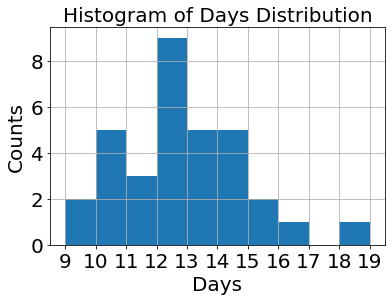

In [55]:
# Check the data distribution shape
n, bins, patches = plt.hist(beijing['counts'])
plt.xlabel('Days')
plt.ylabel('Counts')
plt.title('Histogram of Days Distribution')
plt.locator_params(axis='x', integer=True,nbins=11)
plt.grid(True)
plt.show()

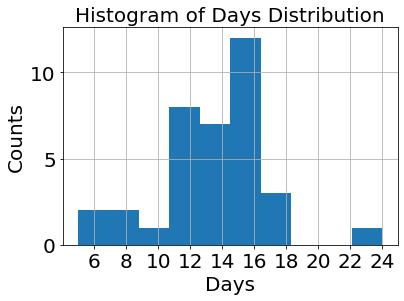

In [56]:
# Check the data distribution shape
n, bins, patches = plt.hist(chengdu['counts'])
plt.xlabel('Days')
plt.ylabel('Counts')
plt.title('Histogram of Days Distribution')
plt.locator_params(axis='x', integer=True,nbins=11)
plt.grid(True)
plt.show()

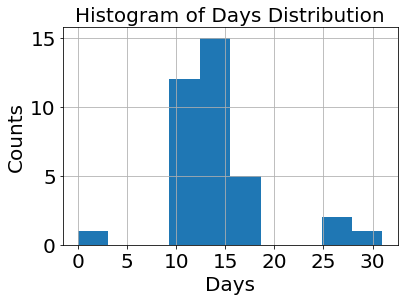

In [57]:
# Check the data distribution shape
n, bins, patches = plt.hist(guangzhou['counts'])
plt.xlabel('Days')
plt.ylabel('Counts')
plt.title('Histogram of Days Distribution')
plt.locator_params(axis='x', integer=True,nbins=11)
plt.grid(True)
plt.show()

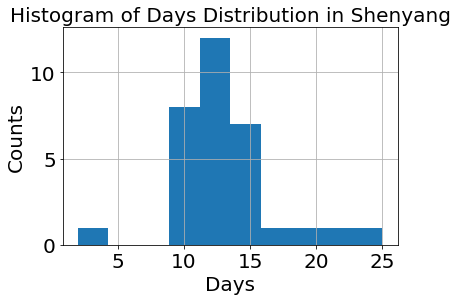

In [62]:
# Check the data distribution shape
n, bins, patches = plt.hist(shenyang['counts'])
plt.xlabel('Days')
plt.ylabel('Counts')
plt.title('Histogram of Days Distribution in Shenyang')
plt.locator_params(axis='x', integer=True,nbins=11)
plt.grid(True)
plt.show()

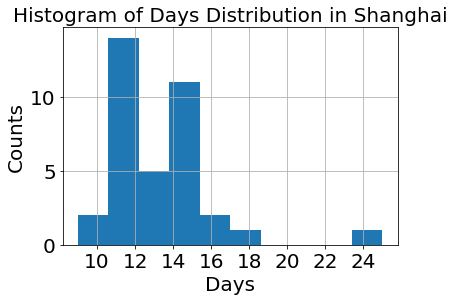

In [60]:
# Check the data distribution shape
n, bins, patches = plt.hist(shanghai['counts'])
plt.xlabel('Days')
plt.ylabel('Counts')
plt.title('Histogram of Days Distribution in Shanghai')
plt.locator_params(axis='x', integer=True,nbins=11)
plt.grid(True)
plt.show()

# Stationarity Check

## Rolling Statistics

In [118]:
# Using moving average to remove the noise
counts_mean_beijing = beijing.rolling(window = 12).mean()
counts_mean_chengdu = chengdu.rolling(window = 12).mean()
counts_mean_guangzhou = guangzhou.rolling(window = 12).mean()
counts_mean_shanghai = shanghai.rolling(window = 12).mean()
counts_mean_shenyang = shenyang.rolling(window = 12).mean()

In [119]:
fig = px.line(beijing, x=beijing.index, y="counts")
fig.update_layout(title='Days Counts Above Monthly Average in Beijing <b>with</b>  noise (April, 2013 - December, 2015)',
                   xaxis_title='Month',
                   yaxis_title='Number of Days Exceed Monthly Average')

removed_fig = px.line(counts_mean, x=beijing.index, y='counts')
removed_fig.update_layout(title='Days Counts Above Monthly Average in Beijing <b>without</b> noise (April, 2013 - December, 2015)',
                           xaxis_title='Month',
                           yaxis_title='Number of Days Exceed Monthly Average')

fig.show()
removed_fig.show()

In [120]:
fig_chengdu = px.line(chengdu, x=chengdu.index, y="counts")
fig_chengdu.update_layout(title='Days Counts Above Monthly Average in Chengdu <b>with</b> noise (April, 2013 - December, 2015)',
                   xaxis_title='Month',
                   yaxis_title='Number of Days Exceed Monthly Average')

removed_fig_chengdu = px.line(counts_mean_chengdu, x=chengdu.index, y='counts')
removed_fig_chengdu.update_layout(title='Days Counts Above Monthly Average in Chengdu <b>without</b> noise (April, 2013 - December, 2015)',
                           xaxis_title='Month',
                           yaxis_title='Number of Days Exceed Monthly Average')
fig_chengdu.show()
removed_fig_chengdu.show()

In [121]:
fig_guangzhou = px.line(guangzhou, x=guangzhou.index, y="counts")
fig.update_layout(title='Days Counts Above Monthly Average in Guangzhou <b>with</b>  noise (April, 2013 - December, 2015)',
                   xaxis_title='Month',
                   yaxis_title='Number of Days Exceed Monthly Average')

removed_fig = px.line(counts_mean_guangzhou, x=guangzhou.index, y='counts')
removed_fig.update_layout(title='Days Counts Above Monthly Average in Guangzhou <b>without</b> noise (April, 2013 - December, 2015)',
                           xaxis_title='Month',
                           yaxis_title='Number of Days Exceed Monthly Average')
fig.show()
removed_fig.show()

In [122]:
fig_shanghai = px.line(shanghai, x=shanghai.index, y="counts")
fig_shanghai.update_layout(title='Days Counts Above Monthly Average in Guangzhou <b>with</b>  noise (April, 2013 - December, 2015)',
                   xaxis_title='Month',
                   yaxis_title='Number of Days Exceed Monthly Average')

removed_fig_shanghai = px.line(counts_mean_shanghai, x=shanghai.index, y='counts')
removed_fig_shanghai.update_layout(title='Days Counts Above Monthly Average in Guangzhou <b>without</b> noise (April, 2013 - December, 2015)',
                           xaxis_title='Month',
                           yaxis_title='Number of Days Exceed Monthly Average')
fig_shanghai.show()
removed_fig_shanghai.show()

In [123]:
fig_shenyang = px.line(shenyang, x = shenyang.index, y="counts")
fig_shenyang.update_layout(title='Days Counts Above Monthly Average in Shenyang <b>with</b>  noise (April, 2013 - December, 2015)',
                   xaxis_title='Month',
                   yaxis_title='Number of Days Exceed Monthly Average')

removed_fig_shenyang = px.line(counts_mean_shenyang, x = shenyang.index, y='counts')
removed_fig_shenyang.update_layout(title='Days Counts Above Monthly Average in Shenyang <b>without</b> noise (April, 2013 - December, 2015)',
                           xaxis_title='Month',
                           yaxis_title='Number of Days Exceed Monthly Average')
fig_shenyang.show()
removed_fig_shenyang.show()

## ADCF Test

# Baseline Model

In [124]:
# Cover the dataframe into arrary
series_value_beijing = beijing.values
series_value_chengdu = chengdu.values
series_value_guangzhou = guangzhou.values
series_value_shanghai = shanghai.values
series_value_shenyang = shenyang.values

In [125]:
value_beijing = pd.DataFrame(series_value_beijing)
value_chengdu = pd.DataFrame(series_value_chengdu)
value_guangzhou = pd.DataFrame(series_value_guangzhou)
value_shanghai = pd.DataFrame(series_value_shanghai)
value_shenyang = pd.DataFrame(series_value_shenyang)

In [126]:
pm_df_beijing = pd.concat([value_beijing, value_beijing.shift(1)], axis = 1)
pm_df_chengdu = pd.concat([value_chengdu, value_chengdu.shift(1)], axis = 1)
pm_df_guangzhou = pd.concat([value_guangzhou, value_guangzhou.shift(1)], axis = 1)
pm_df_shanghai = pd.concat([value_shanghai, value_shanghai.shift(1)], axis = 1)
pm_df_shenyang = pd.concat([value_shenyang, value_shenyang.shift(1)], axis = 1)

In [127]:
pm_final_beijing = pm_df_beijing.iloc[:, [10,21]]
pm_final_beijing.columns = ['Actual_Counts','Predict_Counts']
pm_final_beijing

,Actual_Counts,Predict_Counts
0,14,NaN
1,11,14
2,16,11
3,14,16
4,13,14
5,12,13
6,10,12
7,12,10
8,10,12
9,15,10


In [128]:
# split into train and test sets
X = pm_final.values
train_size = int(len(X) * 0.80)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [129]:
def adfuller_test(df_series):
    results=adfuller(x=df_series)
    labels=['adf statistics', 'pvalue', 'used lag', 'Number of observations']
    for label, result in zip(labels, results):
        print (label+': '+str(result))
    if results[1]<=0.05:
        print ("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print ("weak evidence against the null hypothesis, accept the null hypothesis. Data has unit root and is nonstationary"
)

In [130]:
adfuller_test(pm_final_beijing['Predict_Counts'].dropna(axis=0))
#adfuller_test(pm_final_chengdu['Predict_Counts'].dropna(axis=0))


adf statistics: -6.095997865255059
pvalue: 1.0097668233805171e-07
used lag: 0
Number of observations: 31
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [131]:
from sklearn.metrics import mean_squared_error
# create the persistence model
def model_persistence(x):
	return x

predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE(Mean Squared Error (MSE)): %.3f' % test_score)

Test MSE(Mean Squared Error (MSE)): 24.429


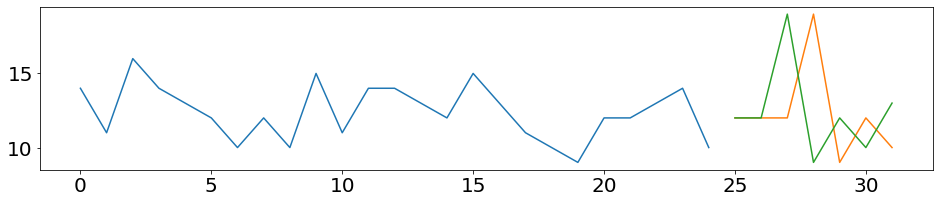

In [132]:
# plot predictions and expected results
pyplot.figure(figsize=(16, 3))
pyplot.plot(train_y)
pyplot.plot([None for i in train_y] + [x for x in test_y])
pyplot.plot([None for i in train_y] + [x for x in predictions])
pyplot.show()

# ACF of PM 2.5

# AROMA

In [133]:
# p = 2,3 d =0, q = 3,4


In [134]:
beijing.shape

(33, 11)

In [135]:
33-6

27

## Train-Test Split

In [136]:
# Train 80% Test 20%
train = beijing[0:27]
test = beijing[27:]

In [137]:
print('The dimension of original dataset is', beijing.shape,
    '\nThe dimension of train dataset is', train.shape,
    '\nThe dimension of test dataset is', test.shape)

The dimension of original dataset is (33, 11) 
The dimension of train dataset is (27, 11) 
The dimension of test dataset is (6, 11)


# Stationarity check

In [138]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train, order=(0, 1, 0), seasonal_order=(1, 1, 1, 12))
results=model.fit()
print (results.summary())

ValueError: ignored

In [ ]:
model = ARIMA(train, order = (2,1,3))

In [ ]:
model.fit()